In [1]:
import pandas as pd 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


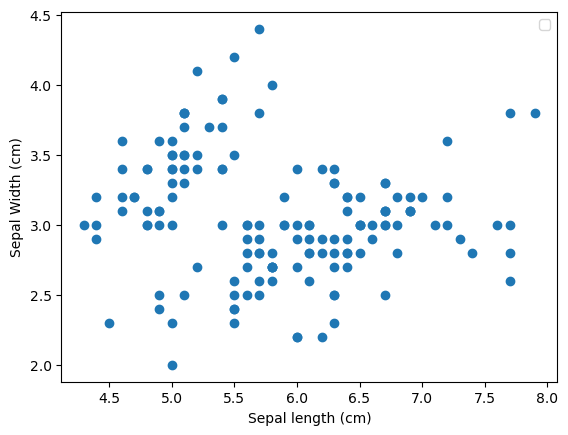

In [7]:
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.legend()

In [8]:
from sklearn.cluster import KMeans
km =KMeans()

In [10]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)
    

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

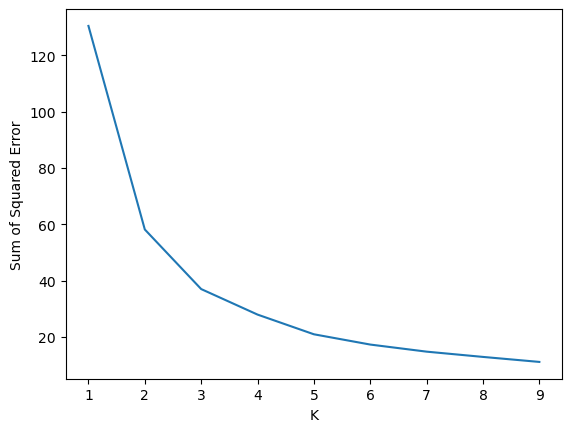

In [11]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

In [12]:
y = iris.target

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y , test_size=0.3)

In [15]:
model = knn.fit(X_train,y_train)

In [16]:
model.score(X_test,y_test)

0.9777777777777777

In [19]:
kmc = KMeans(n_clusters=3)

y_predicted = kmc.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
df["cluster"] = y_predicted
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [21]:
df.groupby('cluster').describe()

sepal length (cm)                                                 \
                    count      mean       std  min   25%  50%   75%  max   
cluster                                                                    
0                    53.0  5.773585  0.371147  4.9  5.60  5.8  6.10  6.3   
1                    47.0  6.812766  0.452825  6.2  6.45  6.7  7.05  7.9   
2                    50.0  5.006000  0.352490  4.3  4.80  5.0  5.20  5.8   

        sepal width (cm)            ... petal length (cm)       \
                   count      mean  ...               75%  max   
cluster                             ...                          
0                   53.0  2.692453  ...             4.900  5.6   
1                   47.0  3.074468  ...             5.900  6.9   
2                   50.0  3.428000  ...             1.575  1.9   

        petal width (cm)                                                
                   count      mean       std  min   25%  50%  75%  max  
cluster                                                                 
0                   53.0  1.433962  0.319822  1.0  1.20  1.4  1.6  2.4  
1                   47.0  1.948936  0.359270  1.3  1.65  2.0  2.3  2.5  
2                   50.0  0.246000  0.105386  0.1  0.20  0.2  0.3  0.6  

[3 rows x 32 columns]

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

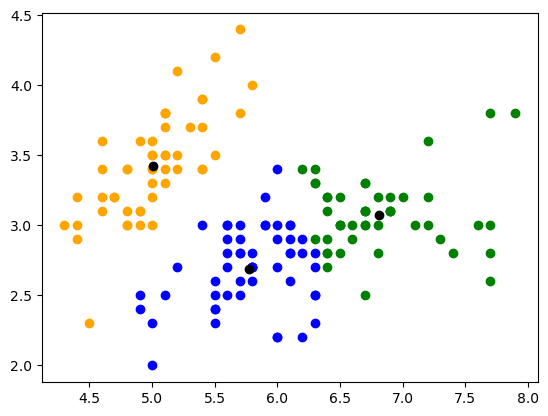

In [26]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="green")
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color="orange")
plt.scatter(kmc.cluster_centers_[:,0],kmc.cluster_centers_[:,1], color="Black", label="marker")
plt.gray()